<a href="https://colab.research.google.com/github/Marqueszzz/graficos_comparativos/blob/main/Comparativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd




caminho_base = "/content/drive/MyDrive/projetocsv/"


df_atendimentos = pd.read_csv(caminho_base + "atendimentos.csv")
df_cavalos = pd.read_csv(caminho_base + "cavalos.csv")
df_pacientes = pd.read_csv(caminho_base + "pacientes.csv")
df_terapeutas = pd.read_csv(caminho_base + "terapeutas.csv")

print("✅ Arquivos carregados com sucesso!")


✅ Arquivos carregados com sucesso!


In [ ]:
from IPython.display import HTML, display
import pandas as pd

# Ajusta o limite global
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

tabelas = [
    ("Atendimentos", df_atendimentos),
    ("Cavalos", df_cavalos),
    ("Pacientes", df_pacientes),
    ("Terapeutas", df_terapeutas),
]

# Lista de tuplas com nome e dataframe
tabelas = [
    ("Atendimentos", df_atendimentos),
    ("Cavalos", df_cavalos),
    ("Pacientes", df_pacientes),
    ("Terapeutas", df_terapeutas),
]

# Gerar HTML com título e tabela formatada para cada DataFrame
html_output = ""
for nome, df in tabelas:
    html_output += f"""
    <div style="
        border-radius: 10px;
        padding: 10px;
        margin: 10px 0;
        box-shadow: 2px 2px 6px rgba(0,0,0,0.1);
    ">
        <h3 style='font-family:Arial; color:#f9f9f9;'>{nome}</h3>
        {df.head(30).style.set_table_attributes("style='border-collapse:collapse; width:100%'").set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#3c5da3'), ('color', 'black'), ('padding', '8px'), ('text-align', 'left')]},
            {'selector': 'td', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]},
            {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'c')]}
        ])._repr_html_()}
    </div>
    """

display(HTML(html_output))


,atendimento_id,paciente_id,terapeuta_id,cavalo_id,data_atendimento,tipo_terapia,sessao_equoterapia,objetivos,resultados,duracao_minutos
0,1,7271,89,3.000000,2025-03-03,Equoterapia,nan,Aumento_da_concentracao,Nenhuma_Melhora,74
1,2,861,95,4.000000,2025-10-20,Equoterapia,Educacao_e_Reeducacao,Melhora_da_postura,Melhora_Moderada,78
2,3,5391,41,32.000000,2025-09-17,Equoterapia,Educacao_e_Reeducacao,Melhora_da_coordenacao_motora,Melhora_Significativa,34
3,4,5192,81,nan,2024-11-16,Equoterapia,nan,Desenvolvimento_da_comunicacao,Melhora_Significativa,85
4,5,5735,47,nan,2025-09-12,Equoterapia,Educacao_e_Reeducacao,Reducao_da_ansiedade,Nenhuma_Melhora,43
5,6,6266,94,nan,2025-09-28,Equoterapia,nan,Fortalecimento_muscular,Melhora_Moderada,56
6,7,467,54,1.000000,2025-03-28,Equoterapia,Hipoterapia,Reducao_da_ansiedade,Nenhuma_Melhora,35
7,8,4427,55,34.000000,2025-03-25,Equoterapia,Educacao_e_Reeducacao,Aumento_da_concentracao,Nenhuma_Melhora,59
8,9,5579,95,45.000000,2025-09-11,Terapia_Tradicional,Hipoterapia,Fortalecimento_muscular,Melhora_Moderada,44
9,10,8323,19,9.000000,2025-04-16,Equoterapia,nan,Fortalecimento_muscular,Melhora_Moderada,56


In [ ]:
import pandas as pd

comparacao = df_atendimentos.groupby(["tipo_terapia", "resultados"]).size().reset_index(name="quantidade" ,)
df.head(30)
display(comparacao)


,tipo_terapia,resultados,quantidade
0,Equoterapia,Melhora_Moderada,1230
1,Equoterapia,Melhora_Significativa,1268
2,Equoterapia,Nenhuma_Melhora,1237
3,Equoterapia,Piora,1260
4,Terapia_Tradicional,Melhora_Moderada,1257
5,Terapia_Tradicional,Melhora_Significativa,1229
6,Terapia_Tradicional,Nenhuma_Melhora,1281
7,Terapia_Tradicional,Piora,1238


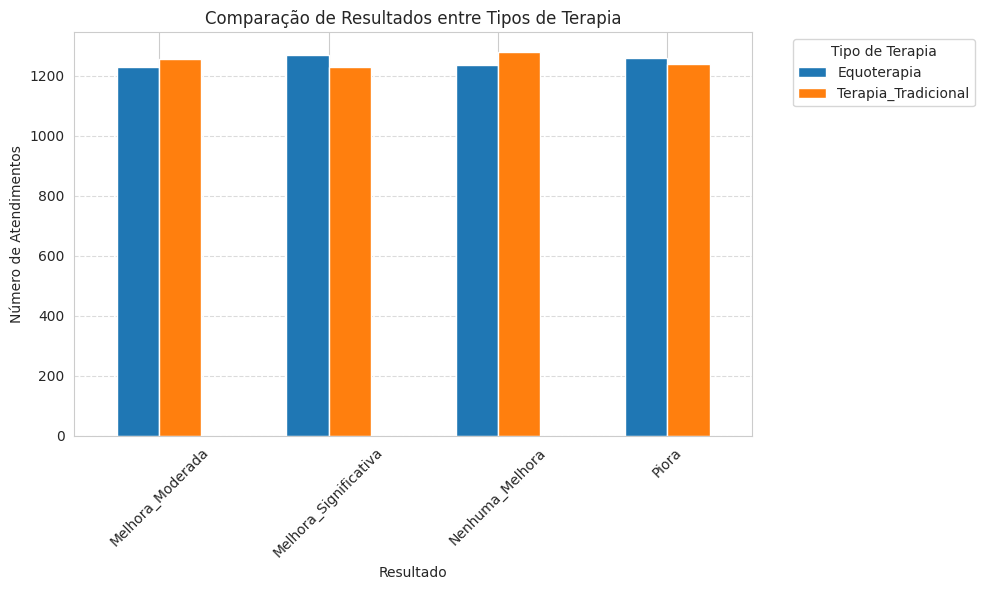

In [ ]:

import matplotlib.pyplot as plt

# Pivotar os dados para o gráfico
pivot = comparacao.pivot(index="resultados", columns="tipo_terapia", values="quantidade").fillna(0)


pivot.plot(kind="bar", figsize=(10,6))

plt.title("Comparação de Resultados entre Tipos de Terapia")
plt.xlabel("Resultado")
plt.ylabel("Número de Atendimentos")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reposicionar a legenda para fora do gráfico
plt.legend(title="Tipo de Terapia", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout para não cortar a legenda
plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd

comparacao = df_terapeutas.groupby(["especialidade", "genero"]).size().reset_index(name="quantidade" ,)
df.head(30)
display(comparacao)


,especialidade,genero,quantidade
0,Fisioterapeuta,Feminino,17
1,Fisioterapeuta,Masculino,10
2,Fonoaudiologo,Feminino,12
3,Fonoaudiologo,Masculino,11
4,Pedagogo,Feminino,5
5,Pedagogo,Masculino,10
6,Psicologo,Feminino,12
7,Psicologo,Masculino,9
8,Terapeuta_Ocupacional,Feminino,4
9,Terapeuta_Ocupacional,Masculino,10


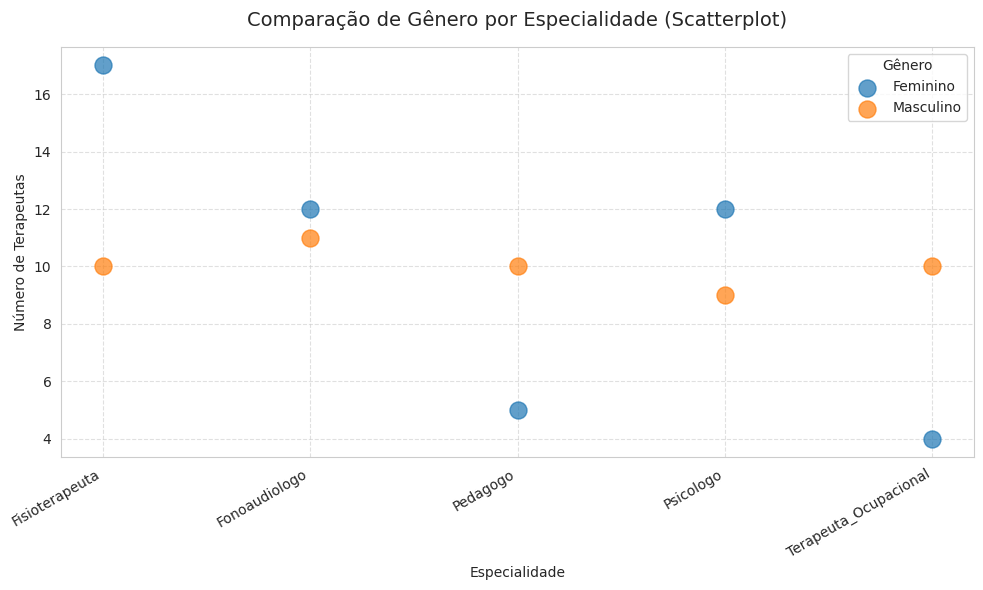

In [ ]:
plt.figure(figsize=(10,6))

for genero in comparacao["genero"].unique():
    dados = comparacao[comparacao["genero"] == genero]
    plt.scatter(
        dados["especialidade"],
        dados["quantidade"],
        s=150,
        alpha=0.7,
        label=genero
    )

plt.title("Comparação de Gênero por Especialidade (Scatterplot)", fontsize=14, pad=15)
plt.xlabel("Especialidade")
plt.ylabel("Número de Terapeutas")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Gênero")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
comparacao = (
    df_cavalos.groupby(["raca", "disponibilidade_equoterapia"])
    .size()
    .reset_index(name="quantidade")
)

# Calcular porcentagem total
comparacao["porcentagem"] = 100 * comparacao["quantidade"] / comparacao["quantidade"].sum()
comparacao


,raca,disponibilidade_equoterapia,quantidade,porcentagem
0,Campolina,False,1,2.0
1,Campolina,True,10,20.0
2,Crioulo,False,1,2.0
3,Crioulo,True,6,12.0
4,Mangalarga_Marchador,False,2,4.0
5,Mangalarga_Marchador,True,8,16.0
6,Puro_Sangue_Ingles,False,10,20.0
7,Puro_Sangue_Ingles,True,3,6.0
8,Quarto_de_Milha,False,3,6.0
9,Quarto_de_Milha,True,6,12.0


Colunas relacionadas a cavalos: ['cavalo_id', 'nome']

DETALHAMENTO DOS CAVALOS

--- True ---
Crioulo: 1, 3, 22, 30, 36, 46
Campolina: 4, 5, 11, 13, 31, 32, 34, 43, 47, 48
Mangalarga_Marchador: 6, 7, 15, 19, 21, 25, 28, 41
Quarto_de_Milha: 9, 10, 12, 16, 18, 35
Puro_Sangue_Ingles: 23, 33, 42

--- False ---
Crioulo: 2
Mangalarga_Marchador: 8, 44
Puro_Sangue_Ingles: 14, 17, 20, 24, 26, 27, 29, 37, 40, 50
Campolina: 38
Quarto_de_Milha: 39, 45, 49


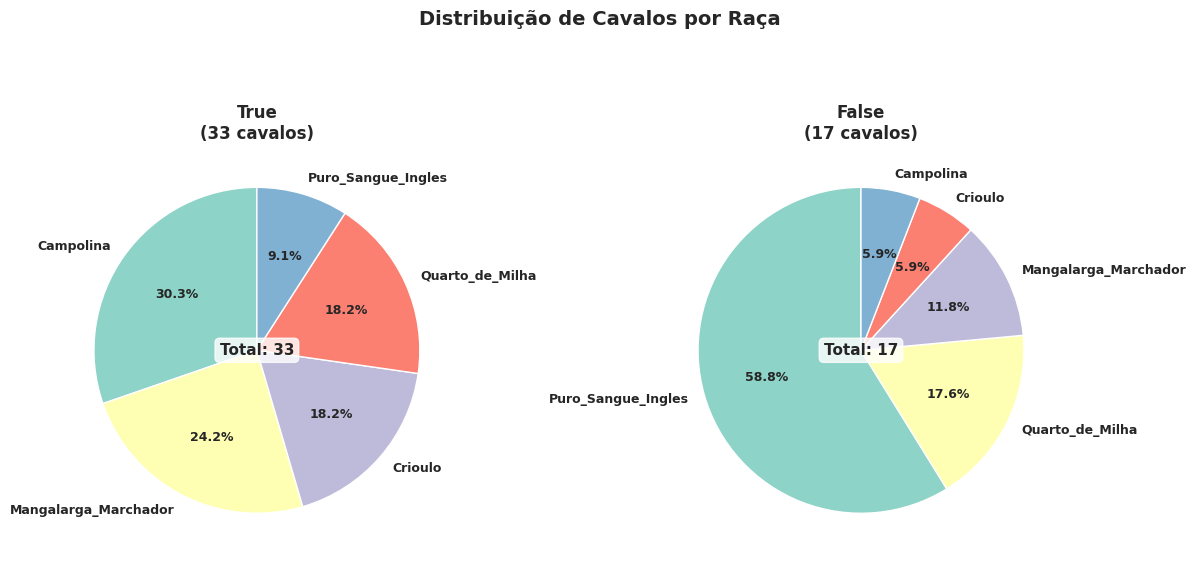

In [ ]:
import matplotlib.pyplot as plt

# Verificar qual é o nome correto da coluna dos cavalos
colunas_cavalo = [col for col in df_cavalos.columns if 'cavalo' in col.lower() or 'nome' in col.lower()]
print("Colunas relacionadas a cavalos:", colunas_cavalo)

# Se não encontrar, usar a primeira coluna que parece ser de identificação
if colunas_cavalo:
    coluna_nome_cavalo = colunas_cavalo[0]
else:
    # Tentar encontrar coluna de texto que possa ser o nome
    colunas_texto = df_cavalos.select_dtypes(include=['object']).columns
    coluna_nome_cavalo = colunas_texto[0] if len(colunas_texto) > 0 else None
    print(f"Usando coluna: {coluna_nome_cavalo}")

if coluna_nome_cavalo:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    disponibilidades = df_cavalos["disponibilidade_equoterapia"].unique()
    colors = plt.cm.Set3.colors

    for i, disp in enumerate(disponibilidades):
        dados = df_cavalos[df_cavalos["disponibilidade_equoterapia"] == disp]
        contagem_raca = dados["raca"].value_counts()

        wedges, texts, autotexts = axes[i].pie(
            contagem_raca.values,
            labels=contagem_raca.index,
            autopct=lambda p: f'{p:.1f}%',
            startangle=90,
            colors=colors,
            textprops={'fontsize':9, 'fontweight':'bold'}
        )

        # Adicionar contagem total no centro
        total = contagem_raca.sum()
        axes[i].text(0, 0, f'Total: {total}', ha='center', va='center',
                    fontsize=11, fontweight='bold',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        axes[i].set_title(f"{disp}\n({total} cavalos)", fontsize=12, fontweight='bold')

    plt.suptitle("Distribuição de Cavalos por Raça", fontsize=14, y=1.02, fontweight='bold')
    plt.tight_layout()

    # Listagem dos cavalos separadamente com o nome correto da coluna
    print("\n" + "="*50)
    print("DETALHAMENTO DOS CAVALOS")
    print("="*50)

    for disp in disponibilidades:
        print(f"\n--- {disp} ---")
        dados_disp = df_cavalos[df_cavalos["disponibilidade_equoterapia"] == disp]
        for raca in dados_disp["raca"].unique():
            cavalos = dados_disp[dados_disp["raca"] == raca][coluna_nome_cavalo].tolist()
            print(f"{raca}: {', '.join(map(str, cavalos))}")

    plt.show()
else:
    print("Não foi possível encontrar uma coluna adequada para os nomes dos cavalos")
    print("Colunas disponíveis:", df_cavalos.columns.tolist())